# matplotlib

Matplotlib is the core plotting package in scientific python.  There are others to explore as well (which we can chat about on slack).

<div class="alert alert-block alert-warning">

There are different interfaces for interacting with matplotlib, an interactive, function-driven (state machine) command-set and an object-oriented version.  We'll focus on the OO interface.
    
</div>

We want matplotlib to work inline in the notebook.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Matplotlib concepts

Matplotlib was designed with the following goals (from mpl docs):

* Plots should look great -- publication quality (e.g. antialiased)
* Postscript output for inclusion with TeX documents
* Embeddable in a graphical user interface for application development
* Code should be easy to understand it and extend
* Making plots should be easy

Matplotlib is mostly for 2-d data, but there are some basic 3-d (surface) interfaces.

Volumetric data requires a different approach

### Gallery

Matplotlib has a great gallery on their webpage -- find something there close to what you are trying to do and use it as a starting point:

https://matplotlib.org/gallery/index.html

### Importing

There are several different interfaces for matplotlib (see https://matplotlib.org/3.1.1/faq/index.html)

Basic ideas:

* `matplotlib` is the entire package
* `matplotlib.pyplot` is a module within matplotlib that provides easy access to the core plotting routines
* `pylab` combines pyplot and numpy into a single namespace to give a MatLab like interface.  You should avoid this&mdash;it might be removed in the future.

There are a number of modules that extend its behavior, e.g. `basemap` for plotting on a sphere, `mplot3d` for 3-d surfaces


### Anatomy of a figure

Figures are the highest level obect and can inlcude multiple axes
![](anatomy1.png)

(figure from: http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure )


### State-machine vs. OO interface

The state-machine interface is similar to matlab -- high level functions are provided to work on the current axes in the current figure

The objected oriented interface is more pythonic -- you create figure and axes objects and interact with them.  It is the preferred way to use matplotlib.

Note: when looking for help online, you often see these two approaches mixed.

See this: https://matplotlib.org/3.2.2/tutorials/introductory/lifecycle.html

### Backends

Interactive backends: pygtk, wxpython, tkinter, ...

Hardcopy backends: PNG, PDF, PS, SVG, ...



# Basic plotting

## State-machine interface

plot() is the most basic command.  Here we also see that we can use LaTeX notation for the axes

(0.0, 6.283185307179586)

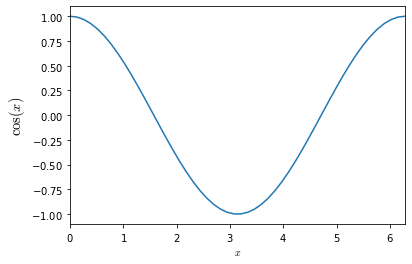

In [12]:
x = np.linspace(0,2.0*np.pi, num=50)
y = np.cos(x)

plt.plot(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$\cos(x)$", fontsize="x-large")
plt.xlim(0, 2.0*np.pi)

Note that when we use the `plot()` command like this, matplotlib automatically creates a figure and an axis for us and it draws the plot on this for us.  This is the _state machine_ interface.  

## OO Interface

(0.0, 6.283185307179586)

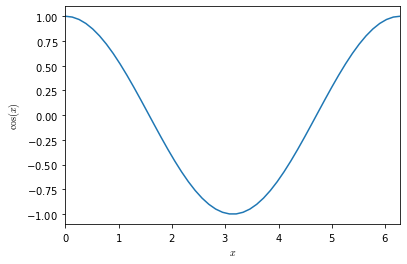

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\cos(x)$")
ax.set_xlim(0, 2*np.pi)

<div class="alert alert-block alert-info"><h3><span class="fa fa-flash"></span> Quick Exercise:</h3>


We can plot 2 lines on a plot simply by calling plot twice.  Make a plot with both `sin(x)` and `cos(x)` drawn

</div>

we can use symbols instead of lines pretty easily too&mdash;and label them

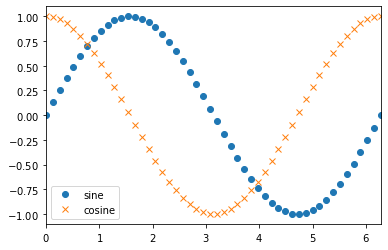

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), "o", label="sine")
ax.plot(x, np.cos(x), "x", label="cosine")
ax.set_xlim(0.0, 2.0*np.pi)
ax.legend()

Here we specified the format using a "format string" (see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)

This has the form `'[marker][line][color]'`

most functions take a number of optional named arguments too

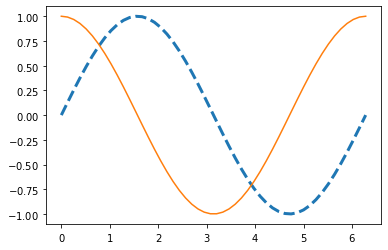

In [16]:
ax.clear()
ax.plot(x, np.sin(x), linestyle="--", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")
fig

There are predefined styles that can be used too.  Generally you need to start from the figure creation for these to take effect

In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


(0.0, 6.283185307179586)

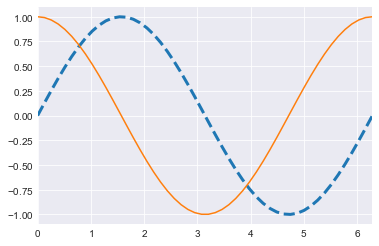

In [18]:
plt.style.use("seaborn-darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), linestyle="--", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")
ax.set_xlim(0.0, 2.0*np.pi)

In [19]:
plt.style.use("default")

# Multiple axes

there are a wide range of methods for putting multiple axes on a grid.  We'll look at the simplest method.

The `add_subplot()` method we've been using can take 3 numbers: the number of rows, number of columns, and current index

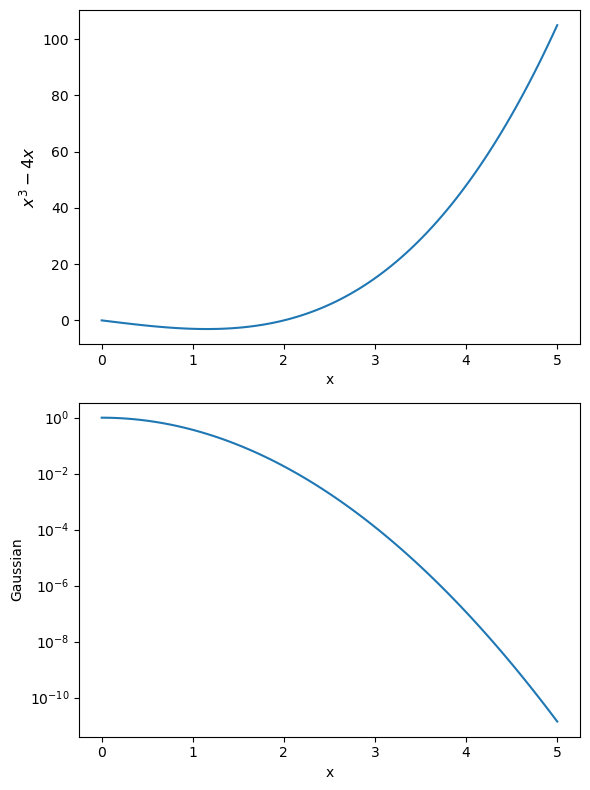

In [20]:
fig = plt.figure()

ax1 = fig.add_subplot(211)

x = np.linspace(0,5,100)
ax1.plot(x, x**3 - 4*x)
ax1.set_xlabel("x")
ax1.set_ylabel(r"$x^3 - 4x$", fontsize="large")

ax2 = fig.add_subplot(212)

ax2.plot(x, np.exp(-x**2))
ax2.set_xlabel("x")
ax2.set_ylabel("Gaussian")

# log scale
ax2.set_yscale("log")

# set the figure size
fig.set_size_inches(6, 8)

# tight_layout() makes sure things don't overlap
fig.tight_layout()

# Visualizing 2-d array data

2-d datasets consist of (x, y) pairs and a value associated with that point.  Here we create a 2-d Gaussian, using the `meshgrid()` function to define a rectangular set of points.

In [21]:
def g(x, y):
    return np.exp(-((x-0.5)**2)/0.1**2 - ((y-0.5)**2)/0.2**2)

N = 100

x = np.linspace(0.0, 1.0, N)
y = x.copy()

xv, yv = np.meshgrid(x, y)

A "heatmap" style plot assigns colors to the data values.  A lot of work has gone into the latest matplotlib to define a colormap that works good for colorblindness and black-white printing.

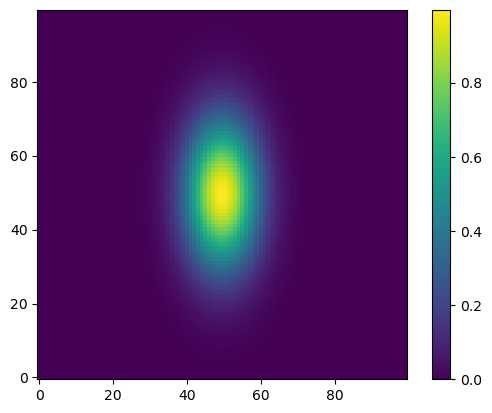

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(g(xv, yv), origin="lower")
plt.colorbar(im, ax=ax)

Sometimes we want to show just contour lines&mdash;like on a topographic map.  The `contour()` function does this for us.

(0.0, 99.0, 0.0, 99.0)

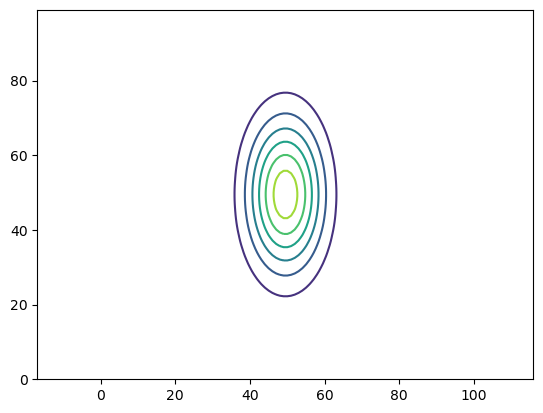

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
contours = ax.contour(g(xv, yv))
ax.axis("equal")   # this adjusts the size of image to make x and y lengths equal

<div class="alert alert-block alert-info"><h3><span class="fa fa-flash"></span> Quick Exercise:</h3>
    
Contour plots can label the contours, using the `ax.clabel()` function.
Try adding labels to this contour plot.
</div>

# Error bars

For experiments, we often have errors associated with the $y$ values.  Here we create some data and add some noise to it, then plot it with errors.

In [24]:
def y_experiment(a1, a2, sigma, x):
    """ return the experimental data in a linear + random fashion a1
        is the intercept, a2 is the slope, and sigma is the error """

    N = len(x)

    # randn gives samples from the "standard normal" distribution
    r = np.random.randn(N)
    y = a1 + a2*x + sigma*r
    return y

N = 40
x = np.linspace(0.0, 100.0, N)
sigma = 25.0*np.ones(N)
y = y_experiment(10.0, 3.0, sigma, x)

<ErrorbarContainer object of 3 artists>

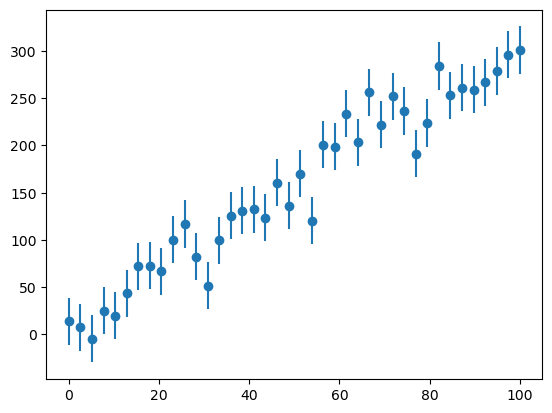

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=sigma, fmt="o")

<div class="alert alert-block alert-info"><h3><span class="fa fa-flash"></span> Quick Exercise:</h3>

Make an error plot with error bars in both x and y
</div>

# Annotations

adding text to the plot is easy

In [26]:
xx = np.linspace(0, 2.0*np.pi, 1000)

Text(1.5707963267948966, 1.0, 'maximum')

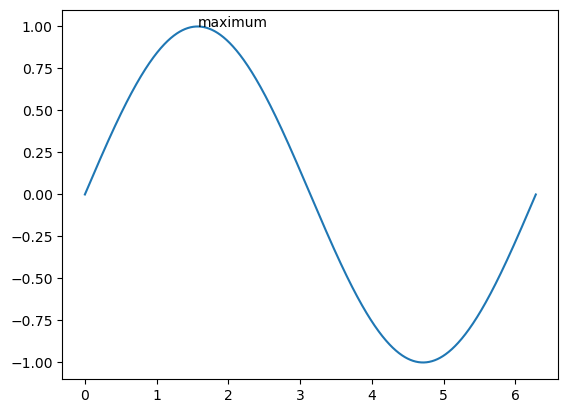

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, np.sin(xx))
ax.text(np.pi/2, np.sin(np.pi/2), r"maximum")

we can also turn off the top and right "splines"

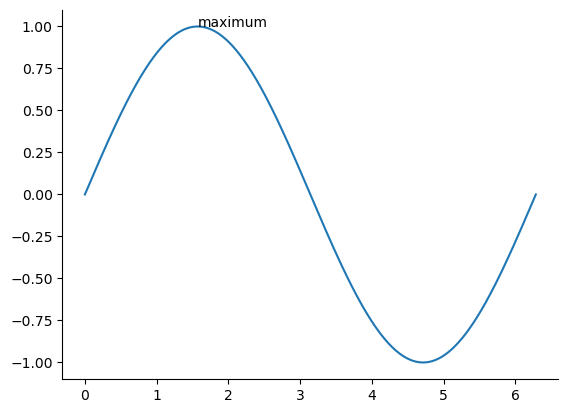

In [28]:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left') 
fig

Annotations with an arrow are also possible

Text(0.05, 0.05, 'a polar annotation')

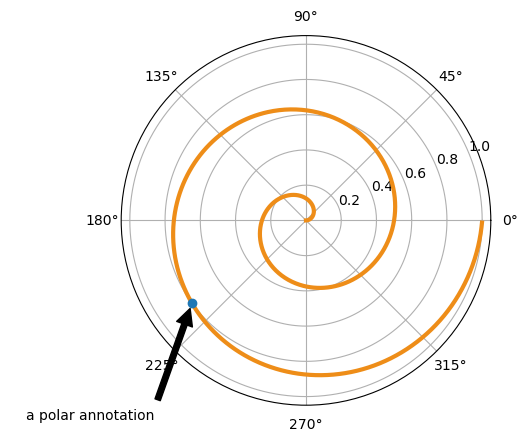

In [29]:
#example from http://matplotlib.org/examples/pylab_examples/annotation_demo.html
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

# Surface plots

matplotlib can't deal with true 3-d data (i.e., x,y,z + a value), but it can plot 2-d surfaces and lines in 3-d.

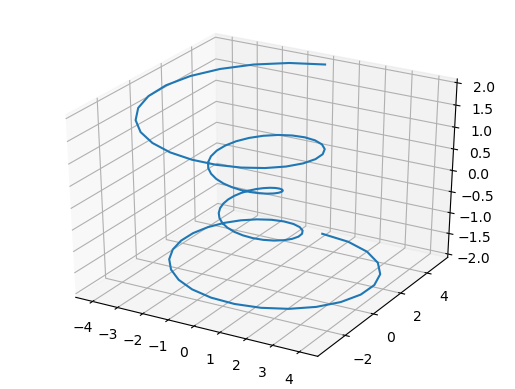

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection="3d")

# parametric curves
N = 100
theta = np.linspace(-4*np.pi, 4*np.pi, N)
z = np.linspace(-2, 2, N)
r = z**2 + 1

x = r*np.sin(theta)
y = r*np.cos(theta)

ax.plot(x,y,z)

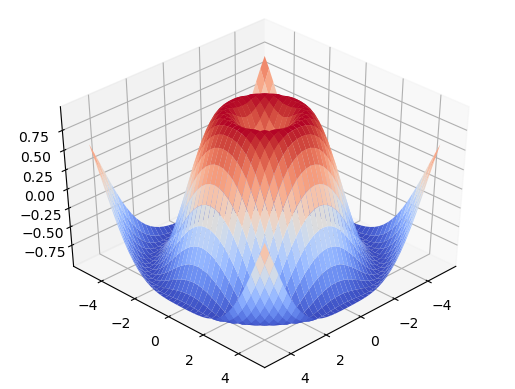

In [31]:
fig = plt.figure()
ax = fig.gca(projection="3d")

X = np.arange(-5,5, 0.25)
Y = np.arange(-5,5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="coolwarm")

# and the view (note: most interactive backends will allow you to rotate this freely)
ax.azim = 45
ax.elev = 40

# Plotting on a sphere

the map funcationality expects stuff in longitude and latitude, so if you want to plot x,y,z on the surface of a sphere using the idea of spherical coordinates, remember that the spherical angle from z (theta) is co-latitude

note: you need the python-basemap package installed for this to work

This also illustrates getting access to a matplotlib toolkit

(1, 0, 0)
(0, 1, 0)
(0, 0, 1)


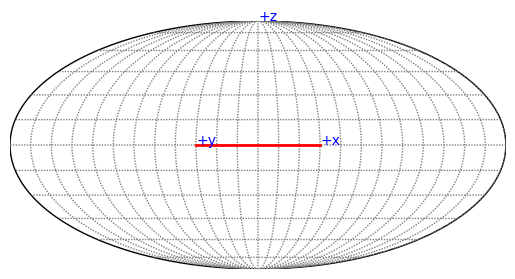

In [32]:
def to_lonlat(x,y,z):
    SMALL = 1.e-100
    rho = np.sqrt((x + SMALL)**2 + (y + SMALL)**2)
    R = np.sqrt(rho**2 + (z + SMALL)**2)
    
    theta = np.degrees(np.arctan2(rho, z + SMALL))
    phi = np.degrees(np.arctan2(y + SMALL, x + SMALL))
    
    # latitude is 90 - the spherical theta
    return (phi, 90-theta)


from mpl_toolkits.basemap import Basemap

# other projections are allowed, e.g. "ortho", moll"
map = Basemap(projection='moll', lat_0 = 45, lon_0 = 45,
              resolution = 'l', area_thresh = 1000.)

map.drawmapboundary()

map.drawmeridians(np.arange(0, 360, 15), color="0.5", latmax=90)
map.drawparallels(np.arange(-90, 90, 15), color="0.5", latmax=90) #, labels=[1,0,0,1])

# unit vectors (+x, +y, +z)
points = [(1,0,0), (0,1,0), (0,0,1)]
labels = ["+x", "+y", "+z"]

for i in range(len(points)):
    p = points[i]
    print(p)
    lon, lat = to_lonlat(p[0], p[1], p[2])
    xp, yp = map(lon, lat)
    s = plt.text(xp, yp, labels[i], color="b", zorder=10)

# draw a great circle arc between two points
lats = [0, 0]
lons = [0, 90]

map.drawgreatcircle(lons[0], lats[0], lons[1], lats[1], linewidth=2, color="r")



also, if you really are interested in earth...

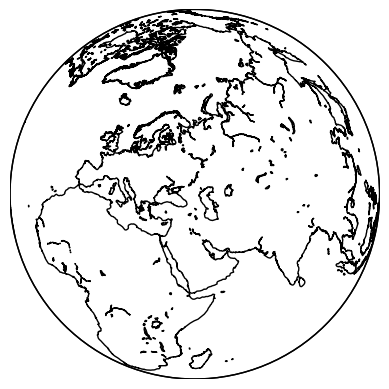

In [33]:
map = Basemap(projection='ortho', lat_0 = 45, lon_0 = 45,
              resolution = 'l', area_thresh = 1000.)

map.drawcoastlines()
map.drawmapboundary()

# Histograms

here we generate a bunch of gaussian-normalized random numbers and make a histogram.  The probability distribution should match
$$y(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-x^2/(2\sigma^2)}$$

Text(0.5, 0, 'x')

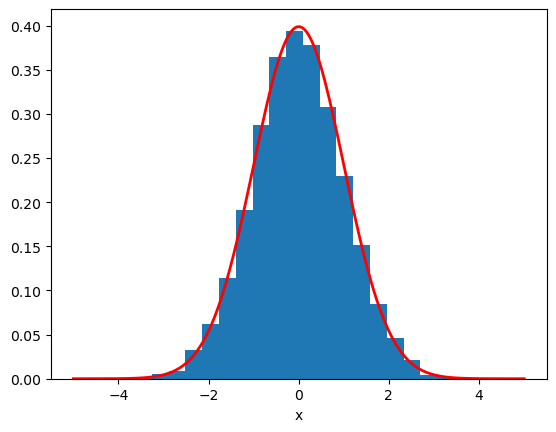

In [34]:
N = 10000
r = np.random.randn(N)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(r, density=True, bins=20)

x = np.linspace(-5,5,200)
sigma = 1.0
ax.plot(x, np.exp(-x**2/(2*sigma**2))/(sigma*np.sqrt(2.0*np.pi)),
         c="r", lw=2)
ax.set_xlabel("x")


# Plotting data from a file

numpy.loadtxt() provides an easy way to read columns of data from an ASCII file

In [35]:
data = np.loadtxt("test1.exact.128.out")
print(data.shape)

(128, 8)


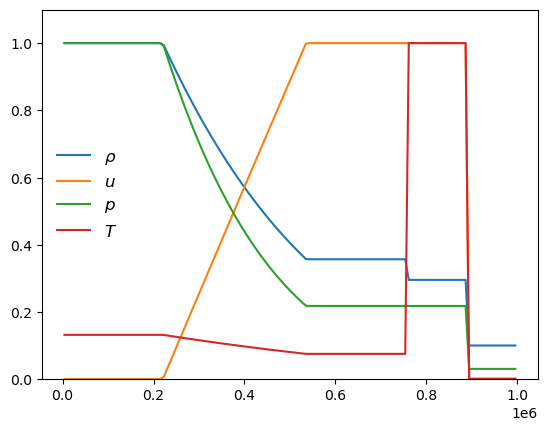

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data[:,1], data[:,2]/np.max(data[:,2]), label=r"$\rho$")
ax.plot(data[:,1], data[:,3]/np.max(data[:,3]), label=r"$u$")
ax.plot(data[:,1], data[:,4]/np.max(data[:,4]), label=r"$p$")
ax.plot(data[:,1], data[:,5]/np.max(data[:,5]), label=r"$T$")
ax.set_ylim(0,1.1)
ax.legend(frameon=False, fontsize=12)

# Final fun

if you want to make things look hand-drawn in the style of xkcd, rerun these examples after doing
plt.xkcd()

In [ ]:
plt.xkcd()